In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv',encoding='utf-8')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.shape

(9578, 14)

In [4]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data=df_dummies


X = data.drop(columns=['credit.policy'])
y = data['credit.policy']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


n_components = 4 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance_ratio}")

Explained variance ratio for each component: [0.14179246 0.11032788 0.08007206 0.07003728]


In [6]:
from sklearn.decomposition import PCA
df2=df_dummies
pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.13981236e+09, 5.90589459e+06, 3.97776230e+04, 1.70017661e+03,
       4.34008408e+02, 4.05875991e+01, 4.60617396e+00, 2.99639080e-01,
       2.64127634e-01, 2.46410734e-01, 1.67199828e-01, 1.28697035e-01,
       9.35576073e-02, 8.59973250e-02, 6.52743130e-02, 6.37803011e-02,
       4.85713363e-02, 3.74186054e-02, 2.43818155e-04, 4.39258613e-33])

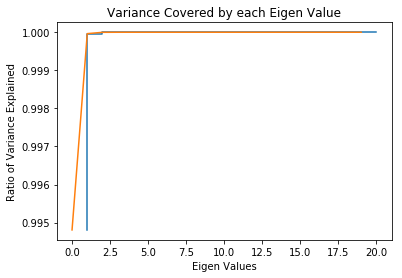

In [7]:
plt.step(list(range(1,21)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

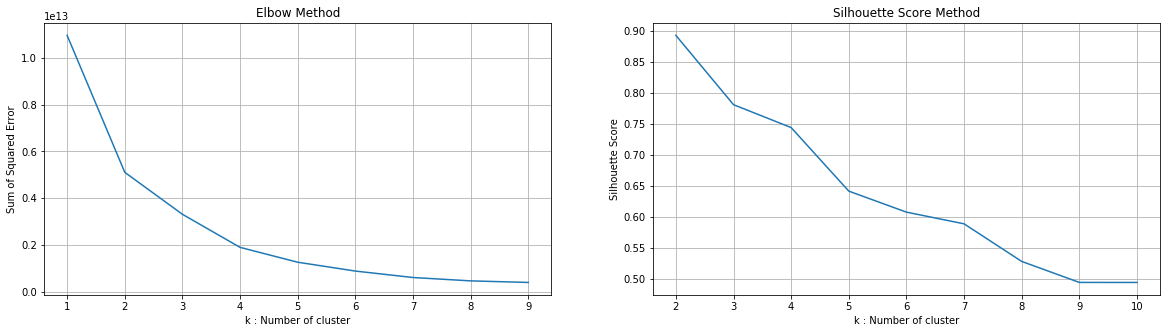

In [8]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(df2)
    labels = kmeans.labels_
    sil.append(silhouette_score(df2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

selected_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti']
X = df_dummies[selected_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
df_dummies['cluster'] = cluster_labels
print(df_dummies[['int.rate', 'installment', 'log.annual.inc', 'dti', 'cluster']].head())

   int.rate  installment  log.annual.inc    dti  cluster
0    0.1189       829.10       11.350407  19.48        0
1    0.1071       228.22       11.082143  14.29        2
2    0.1357       366.86       10.373491  11.63        1
3    0.1008       162.34       11.350407   8.10        2
4    0.1426       102.92       11.299732  14.97        3


In [12]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
n_clusters = 4
# Calculate the Dunn Index
def dunn_index(X, labels):
    # Calculate inter-cluster distance
    inter_cluster_distances = pairwise_distances(X, metric='euclidean')
    min_inter_cluster_distance = np.min(inter_cluster_distances[labels[:, np.newaxis] != labels])

    # Calculate intra-cluster distance
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    intra_cluster_distances = pairwise_distances(centroids, metric='euclidean')
    max_intra_cluster_distance = np.max(intra_cluster_distances)

    # Compute Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

dunn_index_value = dunn_index(X_scaled, cluster_labels)
print(f"Dunn Index: {dunn_index_value:.4f}")
# Compute Silhouette Coefficient
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

Dunn Index: 0.0268
Silhouette Coefficient: 0.2236


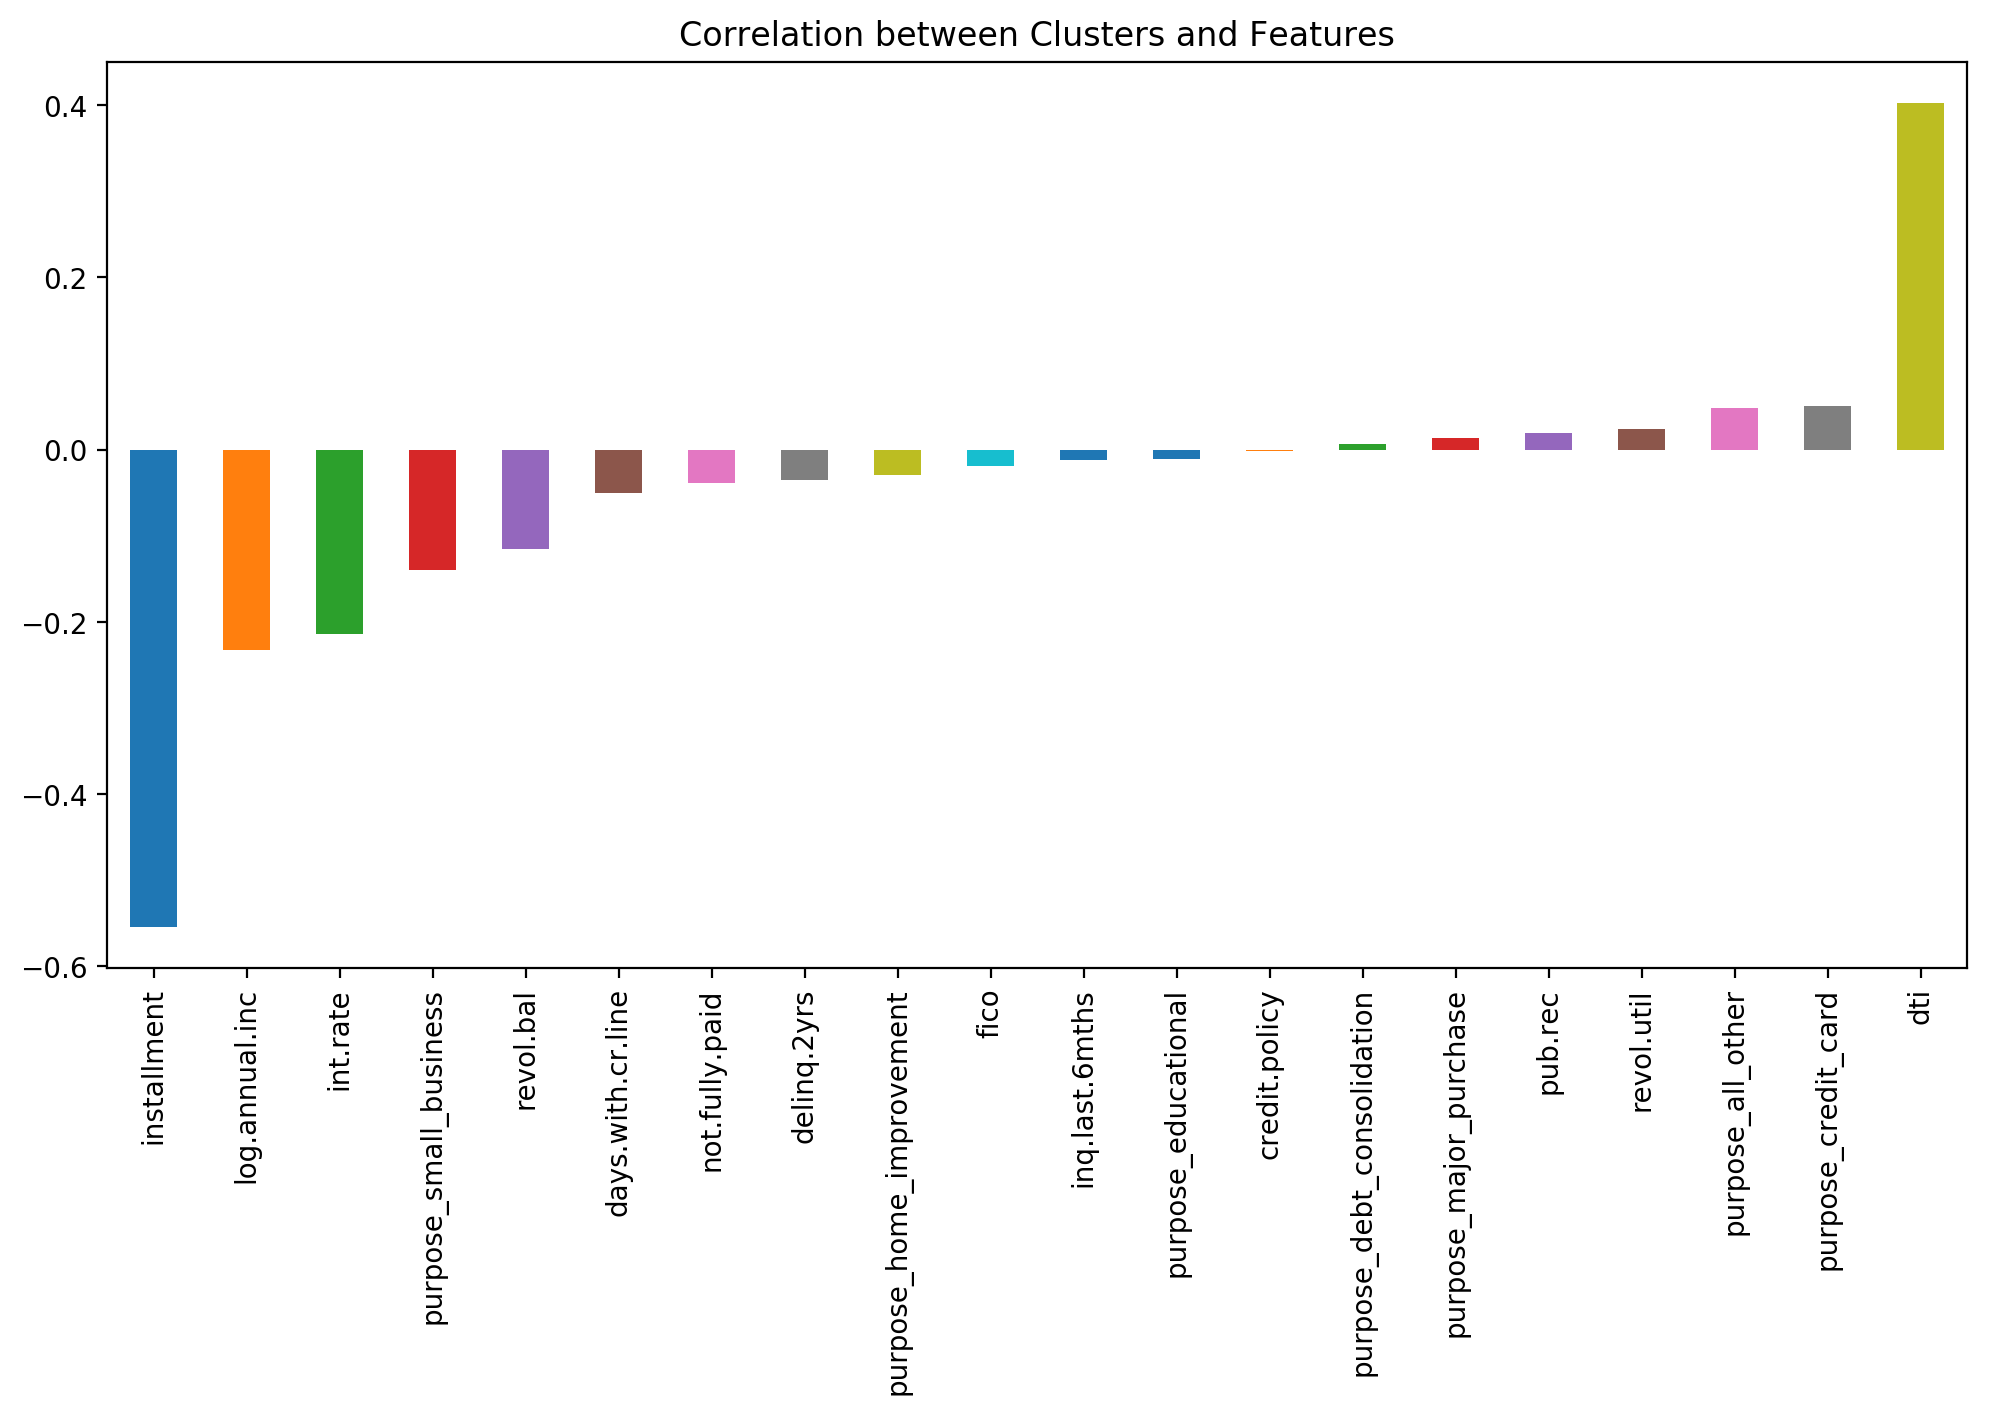

In [13]:
plt.figure(figsize=(12,6),dpi=200)
df_dummies.corr()["cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

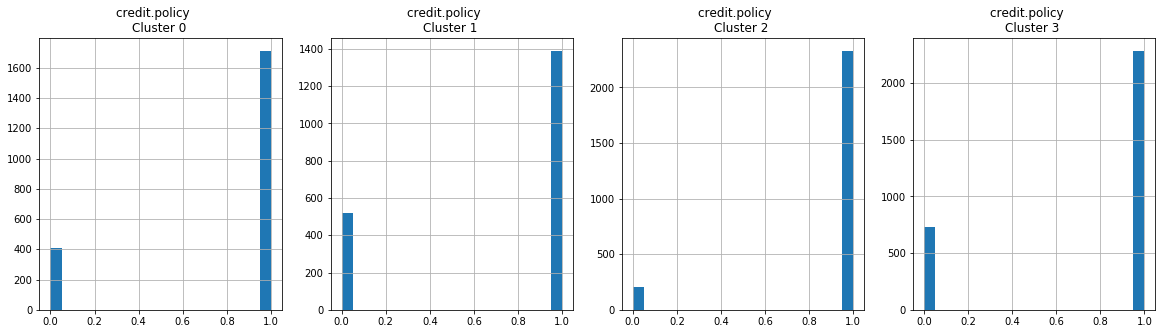

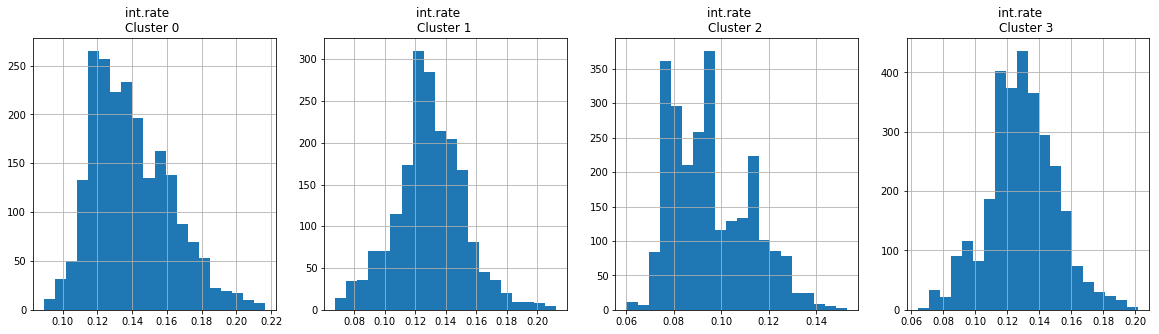

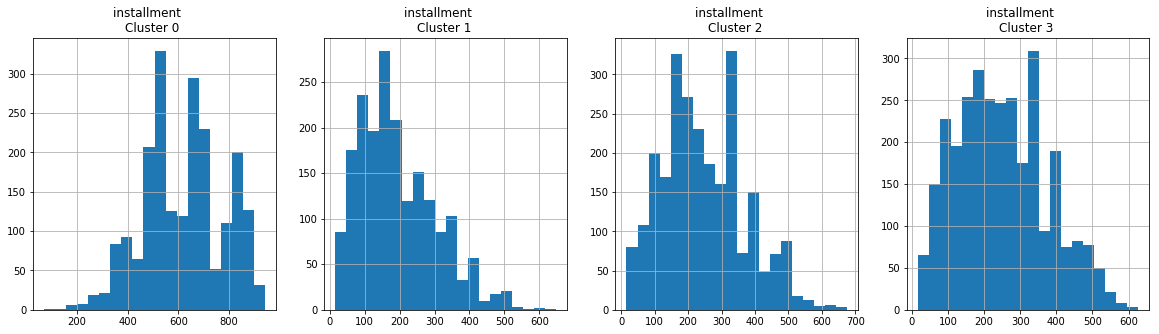

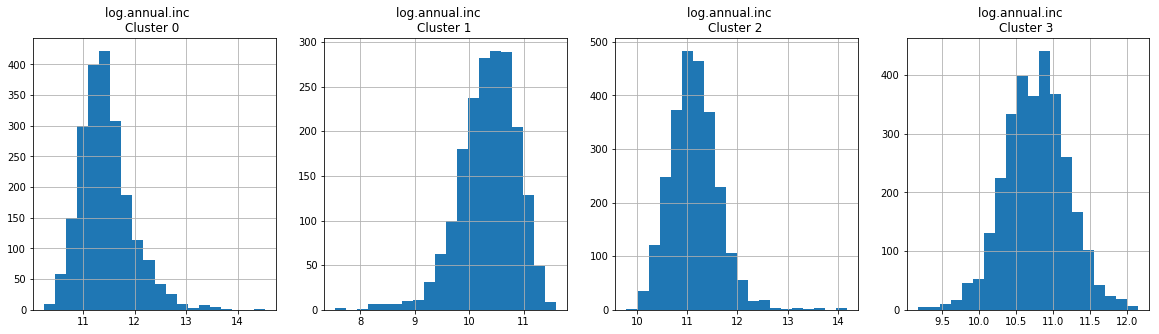

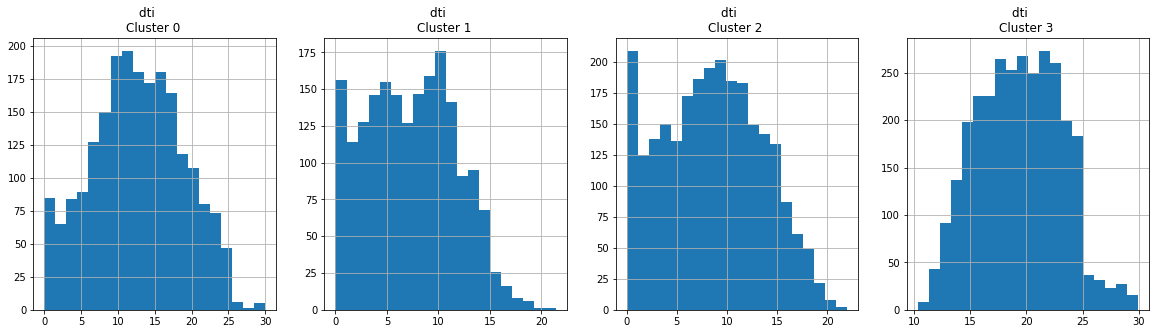

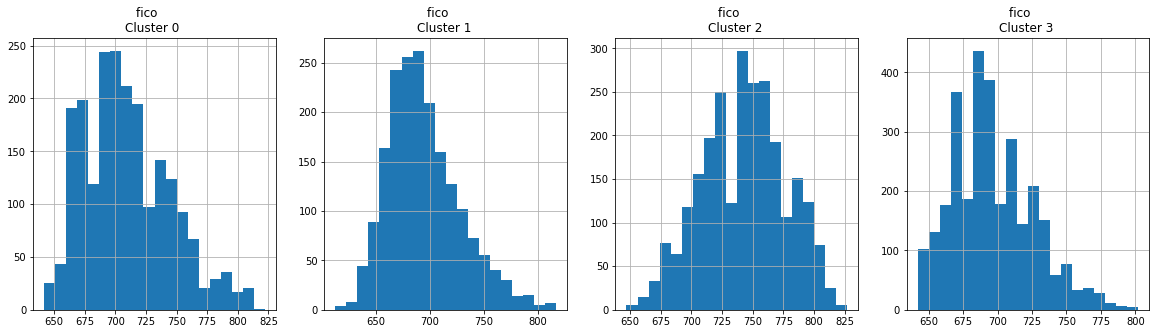

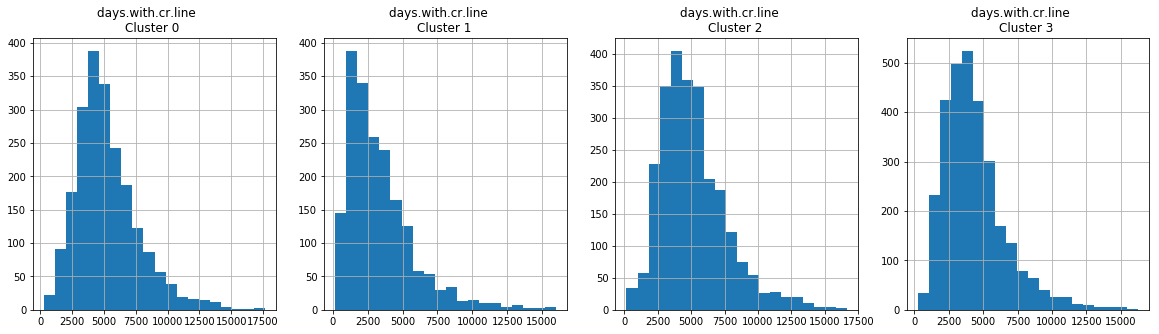

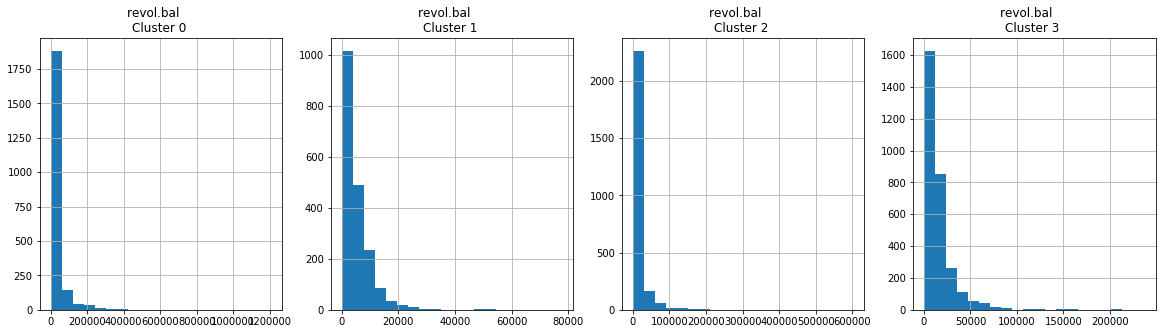

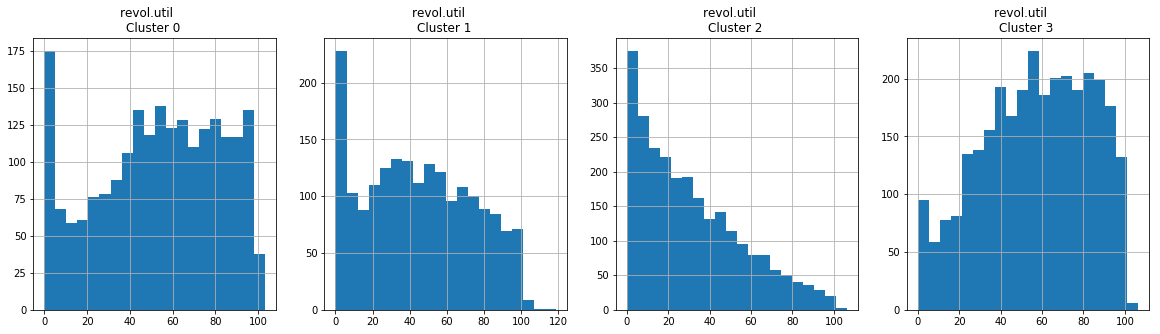

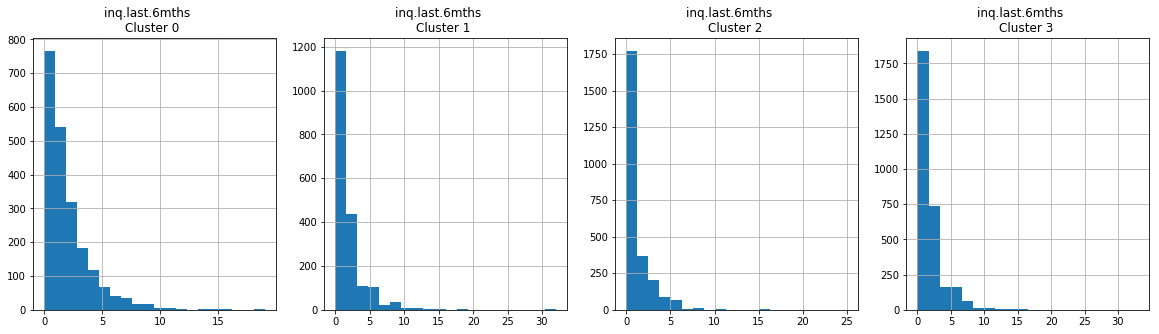

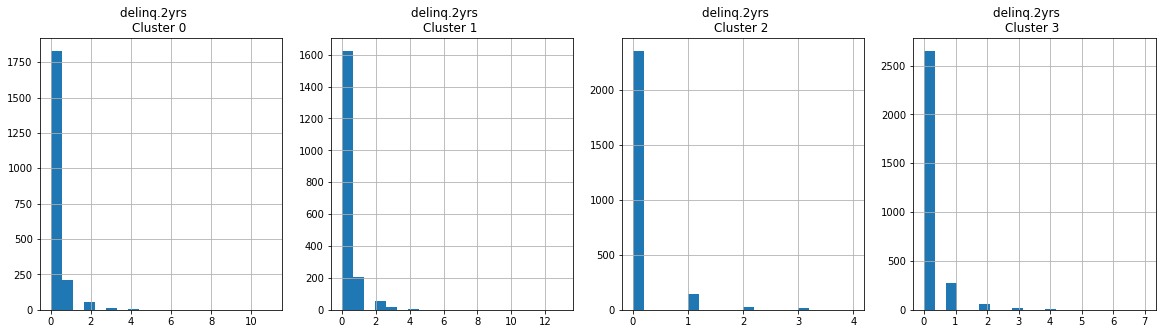

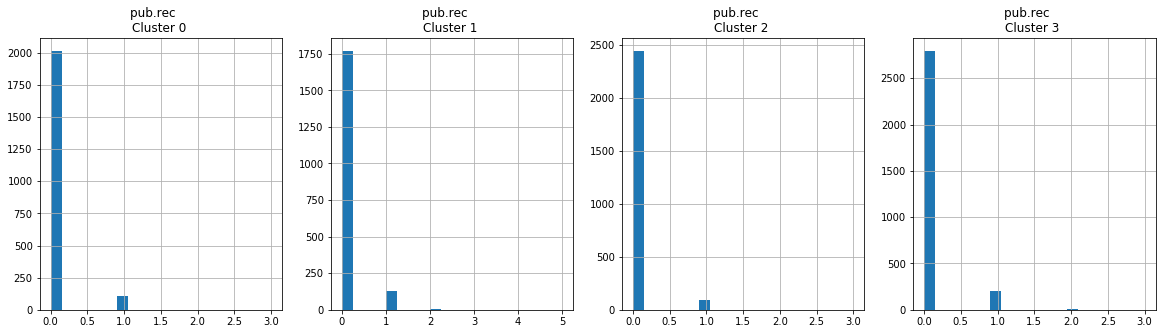

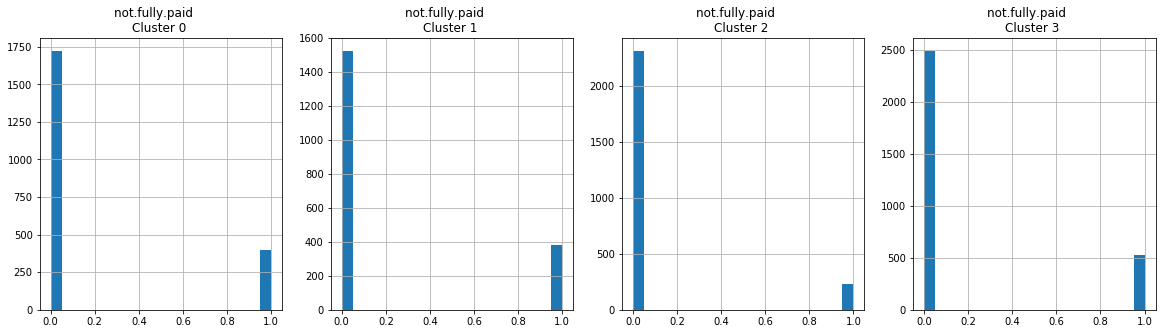

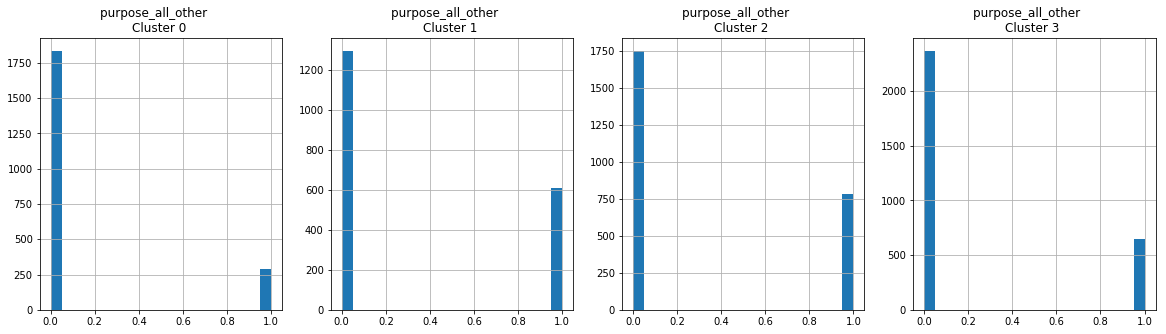

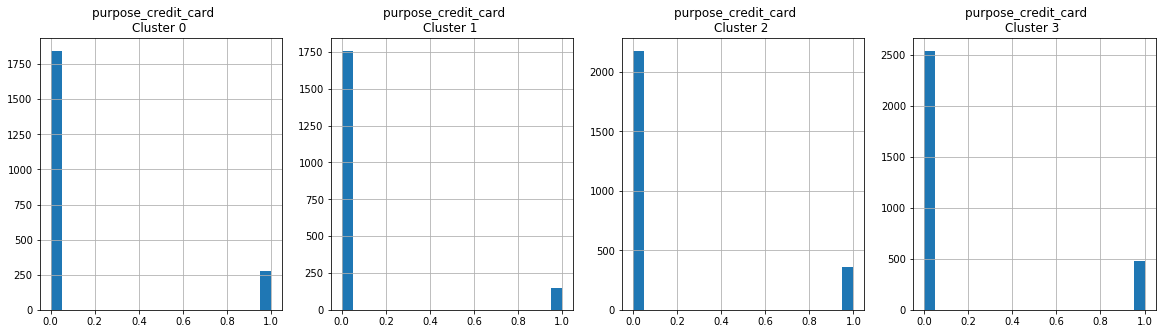

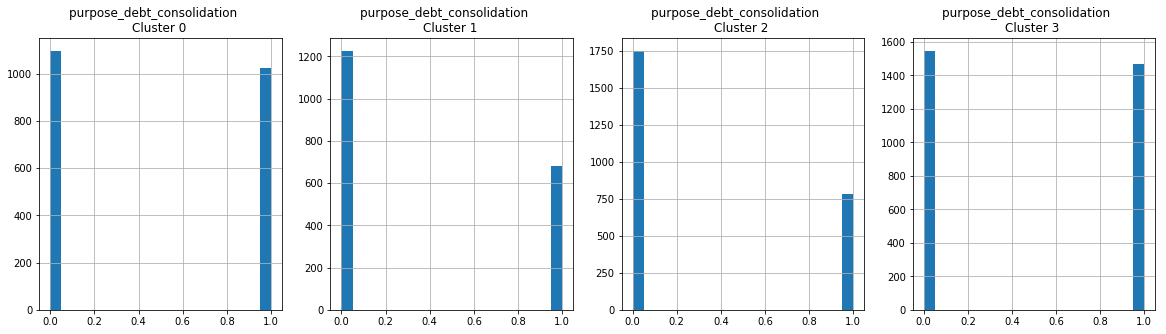

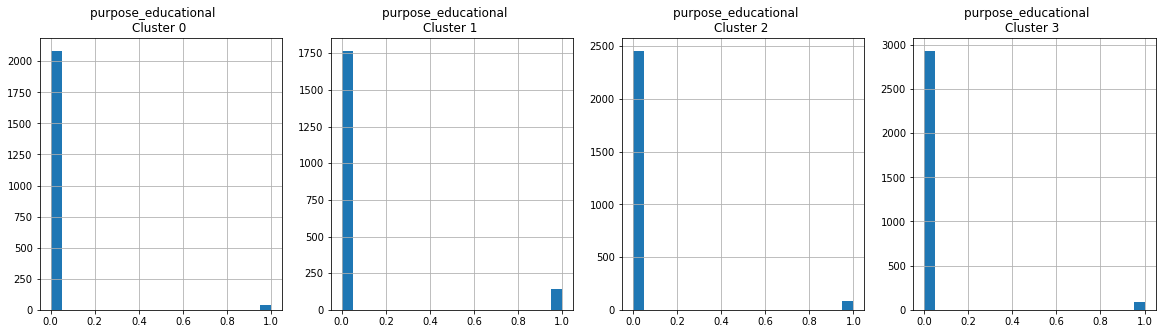

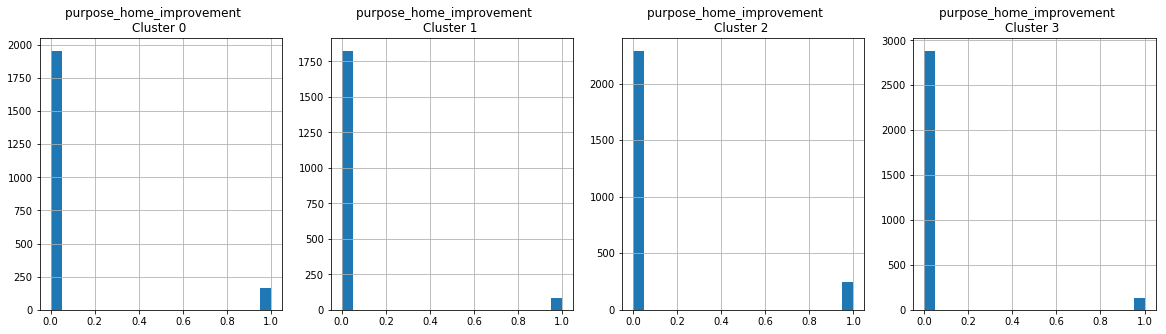

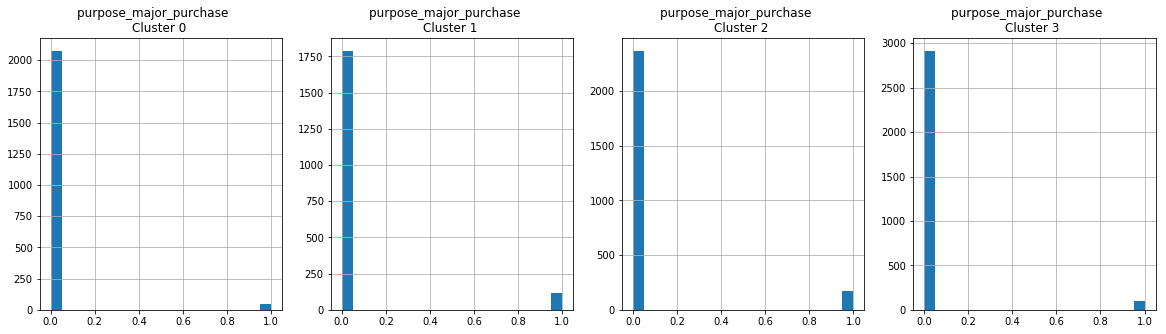

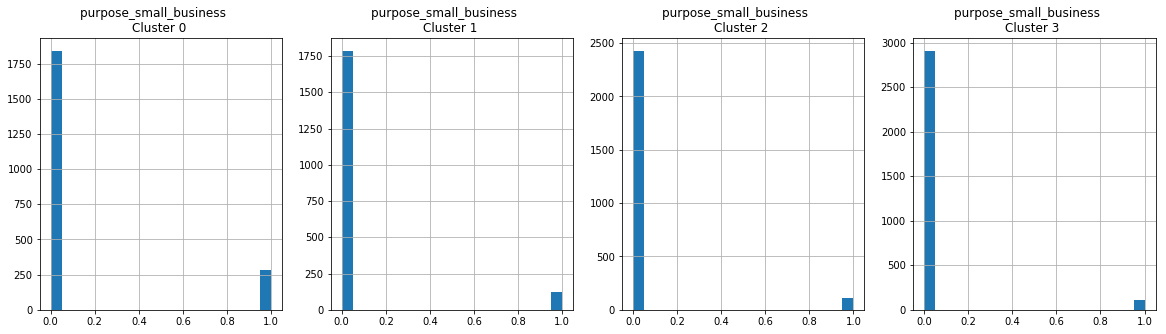

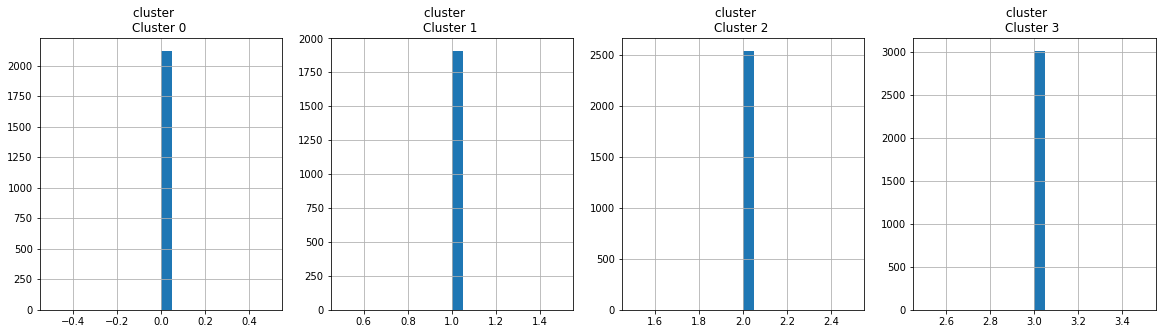

In [14]:

for i in df_dummies.columns:
  plt.figure(figsize = (20, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = df_dummies[df_dummies['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [15]:


selected_columns = ['int.rate', 'installment', 'log.annual.inc', 'dti']
X = df_dummies[selected_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 3 
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(X_scaled)

# Calculate the Dunn Index
def dunn_index(X, labels):
    # Calculate inter-cluster distance
    inter_cluster_distances = pairwise_distances(X, metric='euclidean')
    min_inter_cluster_distance = np.min(inter_cluster_distances[labels[:, np.newaxis] != labels])

    # Calculate intra-cluster distance
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    intra_cluster_distances = pairwise_distances(centroids, metric='euclidean')
    max_intra_cluster_distance = np.max(intra_cluster_distances)

    # Compute Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

dunn_index_value = dunn_index(X_scaled, cluster_labels)
print(f"Dunn Index: {dunn_index_value:.4f}")
# Compute Silhouette Coefficient
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

Dunn Index: 0.0552
Silhouette Coefficient: 0.1745


In [ ]:
#Thank you